In [1]:
!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.6 MB/s eta 0:00:00


### Helper Functions

In [2]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch

def print_encoding(model_inputs, indent=4):
    indent_str = " " * indent
    print("{")
    for k, v in model_inputs.items():
        print(indent_str + k + ":")
        print(indent_str + indent_str + str(v))
    print("}")

![full_nlp_pipeline.png](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg)
Image Credits: [https://huggingface.co/course/chapter2/2?fw=pt](https://huggingface.co/course/chapter2/2?fw=pt)

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
# model = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [4]:
inputs = "I'm excited to learn about Transformers!"
tokenized_inputs = tokenizer(inputs, return_tensors="pt")
outputs = model(**tokenized_inputs)

In [5]:
labels = ['NEGATIVE', 'POSITIVE']
prediction = torch.argmax(outputs.logits)

In [6]:
torch.softmax(outputs.logits, dim=1)

tensor([[0.0012, 0.9988]], grad_fn=<SoftmaxBackward0>)

In [7]:
print(f"Input: {inputs}\n")
print(f"Tokenized Inputs: {tokenized_inputs}\n")
print("Model Outputs:")
print(outputs)
print(f"The prediction is {labels[prediction]}")

Input: I'm excited to learn about Transformers!

Tokenized Inputs: {'input_ids': tensor([[    0,   100,   437,  2283,     7,  1532,    59, 34379,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Model Outputs:
SequenceClassifierOutput(loss=None, logits=tensor([[-3.7800,  2.9480]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
The prediction is POSITIVE


# Tokenizers

In [8]:
from transformers import DistilBertTokenizer, DistilBertTokenizerFast, AutoTokenizer
name = "distilbert/distilbert-base-cased"

tokenizer = DistilBertTokenizer.from_pretrained(name)
print(tokenizer)

tokenizer = AutoTokenizer.from_pretrained(name) # convenient!
print(tokenizer)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

DistilBertTokenizer(name_or_path='distilbert/distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)
DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-cased', vocab_size=28996, model_max_length=5

In [9]:
# Call the tokenizer
input_str = "NPTEL is great!"
tokenized_inputs = tokenizer(input_str, return_tensors="pt")

In [10]:
print_encoding(tokenized_inputs)

{
    input_ids:
        tensor([[  101,   151,  2101, 12880,  2162,  1110,  1632,   106,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [11]:
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

tensor([[  101,   151,  2101, 12880,  2162,  1110,  1632,   106,   102]])
tensor([[  101,   151,  2101, 12880,  2162,  1110,  1632,   106,   102]])


In [12]:
cls = [tokenizer.cls_token_id]
sep = [tokenizer.sep_token_id]

# Tokenization steps:
input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
input_ids_special_tokens = cls + input_ids + sep

decoded_str = tokenizer.decode(input_ids_special_tokens)

print("start:                ", input_str)
print("tokenize:             ", input_tokens)
print("convert_tokens_to_ids:", input_ids)
print("add special tokens:   ", input_ids_special_tokens)
print("--------")
print("decode:               ", decoded_str)

start:                 NPTEL is great!
tokenize:              ['N', '##P', '##TE', '##L', 'is', 'great', '!']
convert_tokens_to_ids: [151, 2101, 12880, 2162, 1110, 1632, 106]
add special tokens:    [101, 151, 2101, 12880, 2162, 1110, 1632, 106, 102]
--------
decode:                [CLS] NPTEL is great! [SEP]


In [13]:
tokenizer.decode([2])

'[unused2]'

In [14]:
# The tokenizer can return pytorch tensors
model_inputs = tokenizer("Hugging Face Transformers is great!", return_tensors="pt")
print("PyTorch Tensors:")
print_encoding(model_inputs)

PyTorch Tensors:
{
    input_ids:
        tensor([[  101, 20164, 10932, 10289, 25267,  1110,  1632,   106,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [15]:
# You can pass multiple strings into the tokenizer and pad them as you need
model_inputs = tokenizer(["NPTEL is great!",
                         "Learning Transformers is fun.",
                         "We will learn about RLHF next week.",
                         ],
                         return_tensors="pt",
                         padding=True,
                         truncation=True)
print(f"Pad token: {tokenizer.pad_token} | Pad token id: {tokenizer.pad_token_id}")
print("Padding:")
print_encoding(model_inputs)

Pad token: [PAD] | Pad token id: 0
Padding:
{
    input_ids:
        tensor([[  101,   151,  2101, 12880,  2162,  1110,  1632,   106,   102,     0,
             0,     0],
        [  101,  9681, 25267,  1110,  4106,   119,   102,     0,     0,     0,
             0,     0],
        [  101,  1284,  1209,  3858,  1164,   155,  2162, 13561,  1397,  1989,
           119,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [16]:
# You can also decode a whole batch at once:
print("Batch Decode:")
print(tokenizer.batch_decode(model_inputs.input_ids))
print()
print("Batch Decode: (no special characters)")
print(tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens=True))

Batch Decode:
['[CLS] NPTEL is great! [SEP] [PAD] [PAD] [PAD]', '[CLS] Learning Transformers is fun. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]', '[CLS] We will learn about RLHF next week. [SEP]']

Batch Decode: (no special characters)
['NPTEL is great!', 'Learning Transformers is fun.', 'We will learn about RLHF next week.']


# Models

For specific tasks, we need "heads" that need to be trained if we're doing sequence classification, question answering, or some other task.

Hugging Face automatically sets up the architecture we need when we specify the model class. For example, we are doing sentiment analysis, so we are going to use `DistilBertForSequenceClassification`. If we were going to continue training DistilBERT on its masked-language modeling training objective, we would use `DistilBertForMaskedLM`, and if we just wanted the model's representations, maybe for our own downstream task, we could just use `DistilBertModel`.


Here's a diagram of a model recreated from one found here: [https://huggingface.co/course/chapter2/2?fw=pt](https://huggingface.co/course/chapter2/2?fw=pt).
![model_illustration.png](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/transformer_and_head.svg)


Here are some examples.
```
*Model
*ForMaskedLM
*ForSequenceClassification
*ForTokenClassification
*ForQuestionAnswering
*ForMultipleChoice
...
```
where `*` can be `AutoModel` or a specific pretrained model (e.g. `DistilBert`)


There are three types of models:
* Encoders (e.g. BERT)
* Decoders (e.g. GPT2)
* Encoder-Decoder models (e.g. T5)

Note that not all models are compatible with all model architectures, for example DistilBERT is not compatible with the Seq2Seq models because it only consists of an encoder.


In [17]:
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification, DistilBertModel
print('Loading base model')
base_model = DistilBertModel.from_pretrained('distilbert-base-cased')
print("Loading classification model from base model's checkpoint")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2)


Loading base model


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading classification model from base model's checkpoint


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
model_inputs = tokenizer(input_str, return_tensors="pt")

In [19]:
model_outputs = model(input_ids=model_inputs.input_ids, attention_mask=model_inputs.attention_mask)

In [20]:
model_outputs = model(**model_inputs)

print(model_inputs)
print()
print(model_outputs)
print()
print(f"Distribution over labels: {torch.softmax(model_outputs.logits, dim=1)}")

{'input_ids': tensor([[  101,   151,  2101, 12880,  2162,  1110,  1632,   106,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

SequenceClassifierOutput(loss=None, logits=tensor([[0.0649, 0.0490]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Distribution over labels: tensor([[0.5040, 0.4960]], grad_fn=<SoftmaxBackward0>)


These models are just Pytorch Modules! We can can calculate the loss with `loss_func` and call `loss.backward`. We can use any of the optimizers or learning rate schedulers that we use in PyTorch.

In [21]:
# You can calculate the loss like normal
label = torch.tensor([1])
loss = torch.nn.functional.cross_entropy(model_outputs.logits, label)
print(loss)
loss.backward()

tensor(0.7011, grad_fn=<NllLossBackward0>)


Hugging Face provides an additional easy way to calculate the loss as well:

In [22]:
# To calculate the loss, we need to pass in a label:
model_inputs = tokenizer(input_str, return_tensors="pt")

labels = ['NEGATIVE', 'POSITIVE']
model_inputs['labels'] = torch.tensor([1])

model_outputs = model(**model_inputs)


print(model_outputs)
print()
print(f"Model predictions: {labels[model_outputs.logits.argmax()]}")

SequenceClassifierOutput(loss=tensor(0.7011, grad_fn=<NllLossBackward0>), logits=tensor([[0.0649, 0.0490]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Model predictions: NEGATIVE


### Accessing the hidden states and attention weights from the models

In [23]:
input_str

'NPTEL is great!'

In [24]:
from transformers import AutoModel

model = AutoModel.from_pretrained("distilbert-base-cased", output_attentions=True, output_hidden_states=True)
model.eval()

model_inputs = tokenizer(input_str, return_tensors="pt")
with torch.no_grad():
    model_output = model(**model_inputs)


print("Hidden state size (per layer):  ", model_output.hidden_states[0].shape)
print("Attention head size (per layer):", model_output.attentions[0].shape)     # (batch_size, n_head, query_tokens, key_tokens)
                                                                               # y-axis is query, x-axis is key
print(model_output)

DistilBertSdpaAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Hidden state size (per layer):   torch.Size([1, 9, 768])
Attention head size (per layer): torch.Size([1, 12, 9, 9])
BaseModelOutput(last_hidden_state=tensor([[[ 0.3703,  0.1238,  0.0520,  ...,  0.1185,  0.2186,  0.1087],
         [-0.0158, -0.0192,  0.2583,  ...,  0.1047,  0.6680,  0.3740],
         [-0.0081, -0.2347,  0.2390,  ...,  0.1056,  0.3438,  0.3356],
         ...,
         [ 0.2504,  0.0021,  0.0520,  ...,  0.5256, -0.1301,  0.3255],
         [ 0.3627,  0.2835,  0.3559,  ...,  0.5394,  0.0973,  0.4440],
         [ 0.9605,  0.4005,  0.5138,  ...,  0.6362,  0.9158,  0.2539]]]), hidden_states=(tensor([[[ 0.5521,  0.1778, -0.0585,  ..., -0.0160,  0.2085, -0.1154],
         [-0.8897,  1.1562, -0.2525,  ...,  0.8949,  0.9692, -0.6067],
         [-1.9209, -0.0788, -0.2632,  ...,  1.5771,  0.2331,  0.6084],
         ...,
         [-0.9263,  0.0137, -0.4151,  ..., -0.5369, -0.6277,  0.8462],
         [-0.5610,  0.9675,  0.8943,  ...,  0.7401, -1.1003,  0.0229],
         [-0.4382,  0.0

In [41]:
tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
print(len(tokens))

9


In [42]:
n_layers = len(model_output.attentions)
n_heads = model_output.attentions[0].shape[1]
print("Total Number of Layers in the Model: ", n_layers)
print("Total Number of Attention Heads in each Layer: ", n_heads)

Total Number of Layers in the Model:  6
Total Number of Attention Heads in each Layer:  12


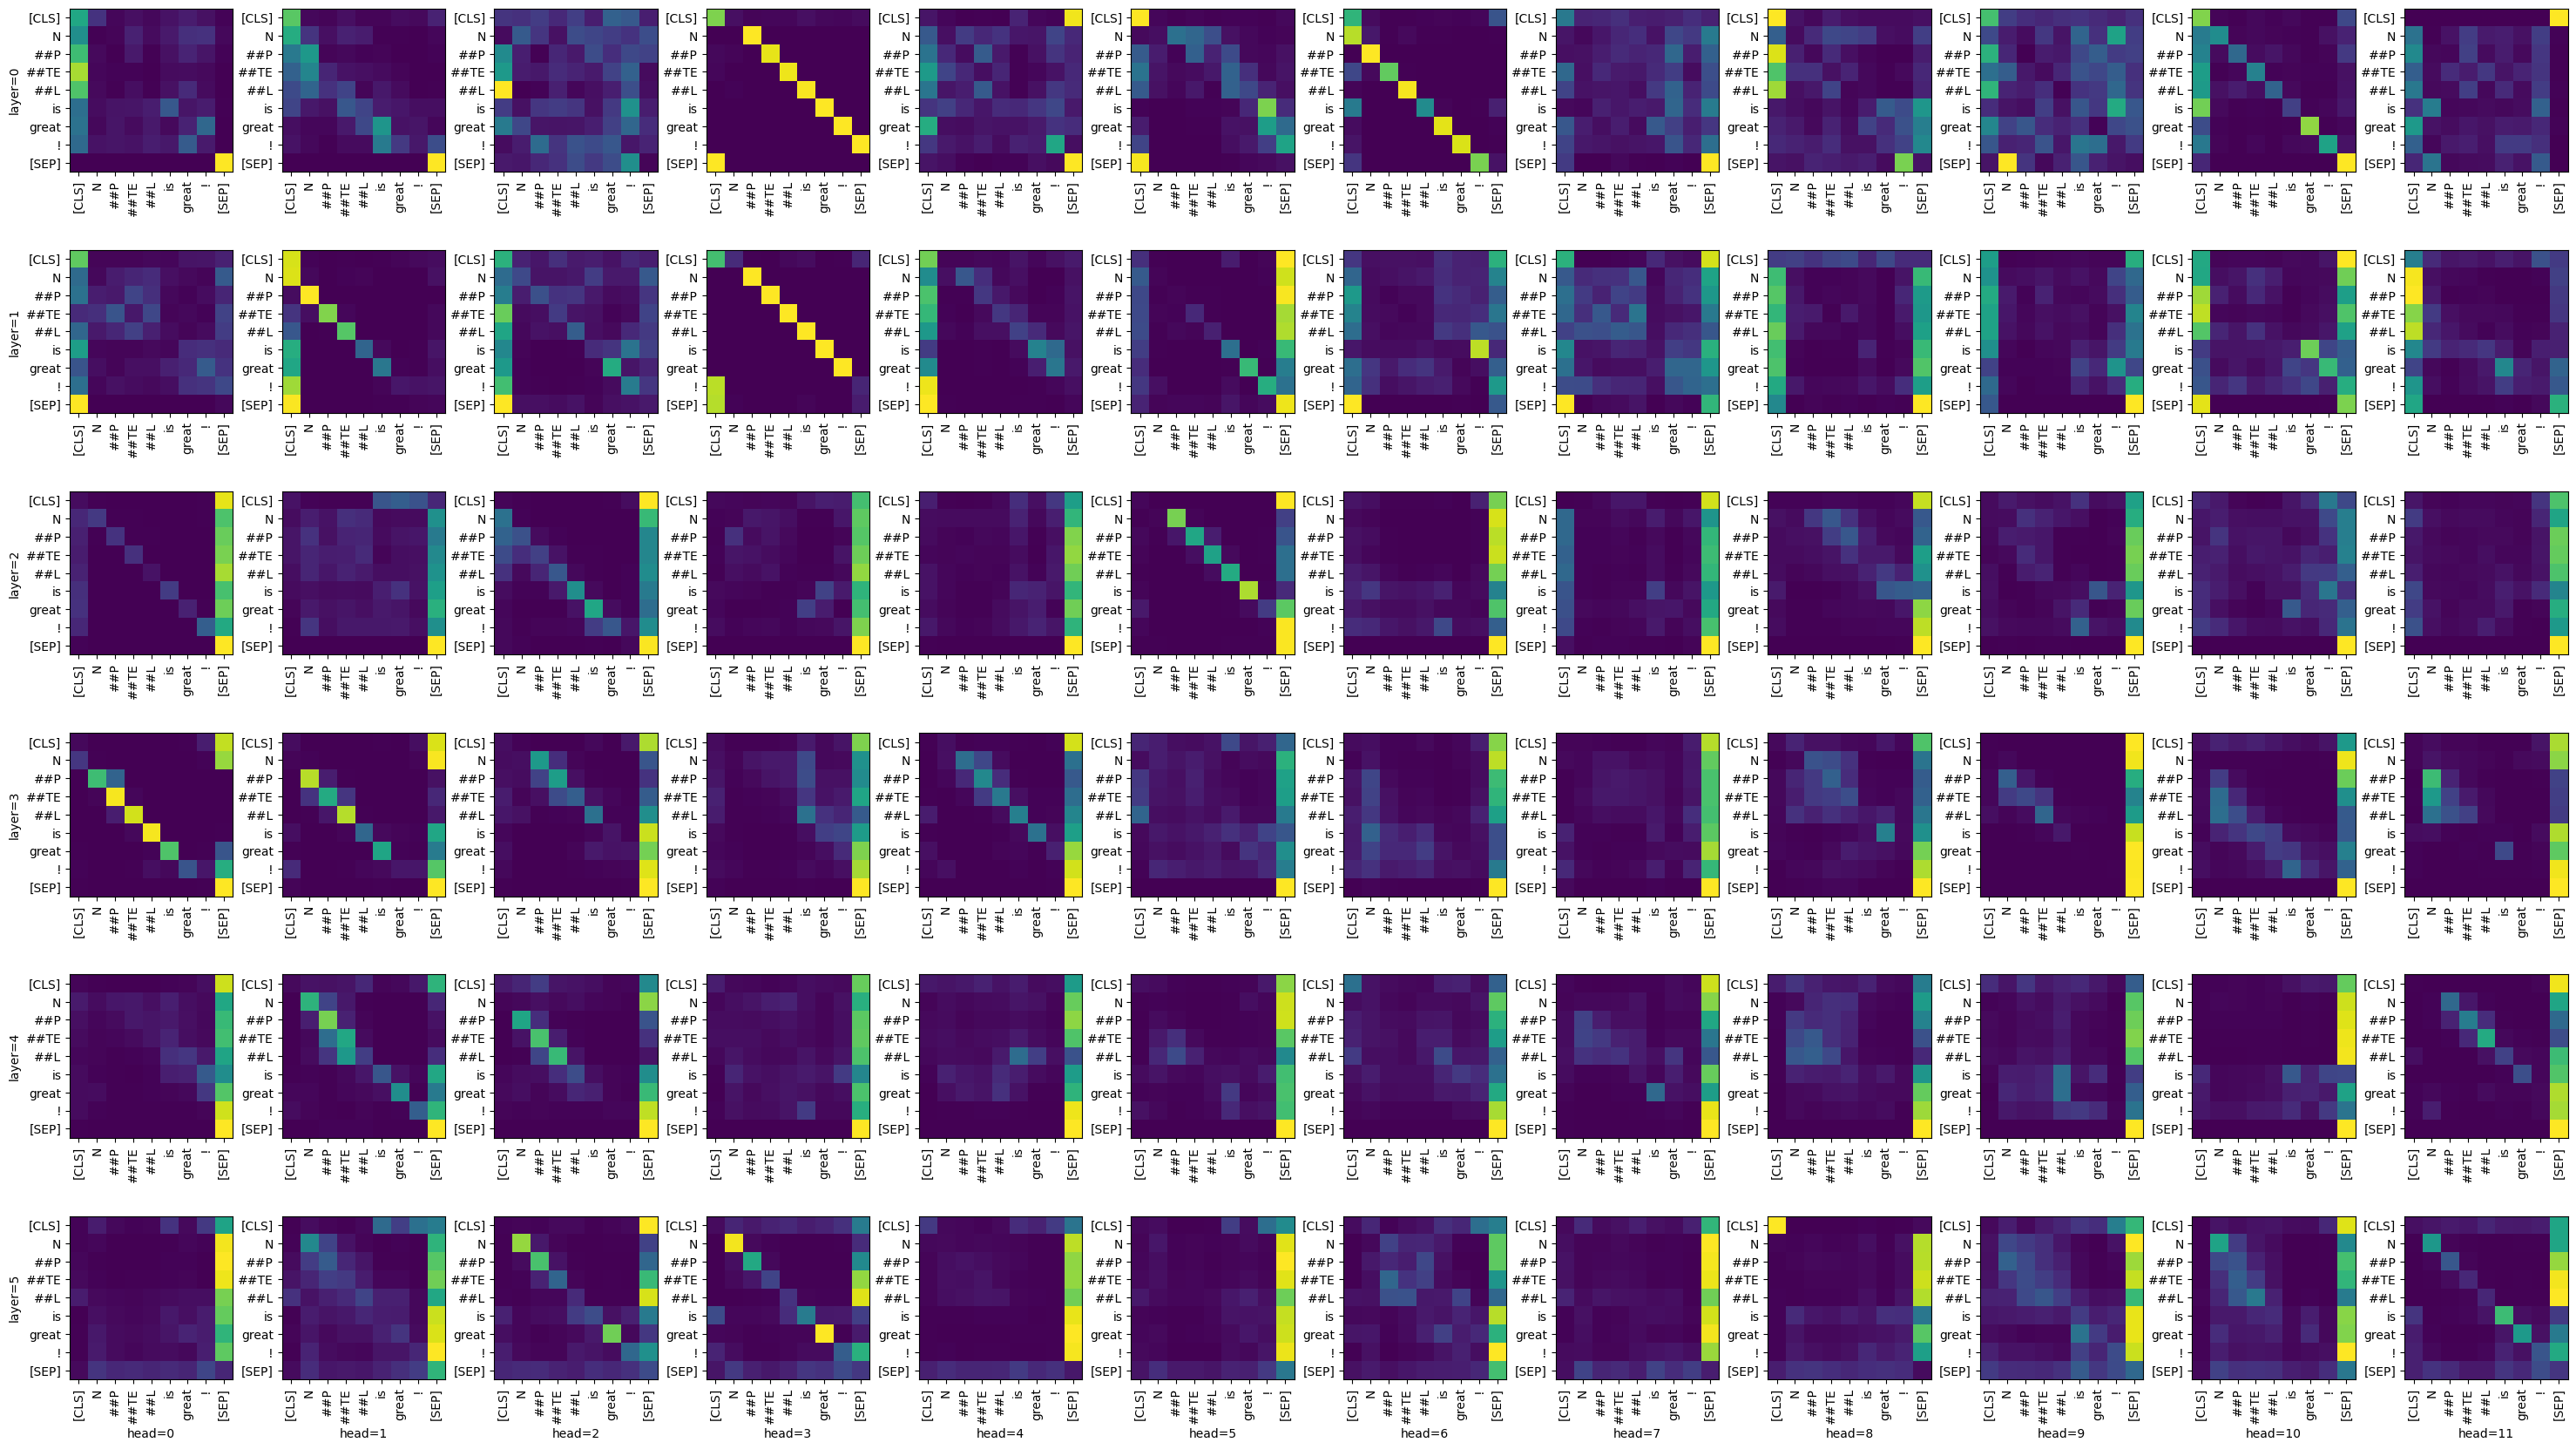

In [43]:
fig, axes = plt.subplots(n_layers, n_heads)
fig.set_size_inches(18.5*2, 10.5*2)
for layer in range(n_layers):
    for i in range(n_heads):
        axes[layer, i].imshow(model_output.attentions[layer][0, i])
        axes[layer][i].set_xticks(list(range(9)))
        axes[layer][i].set_xticklabels(labels=tokens, rotation="vertical")
        axes[layer][i].set_yticks(list(range(9)))
        axes[layer][i].set_yticklabels(labels=tokens)

        if layer == 5:
            axes[layer, i].set(xlabel=f"head={i}")
        if i == 0:
            axes[layer, i].set(ylabel=f"layer={layer}")

plt.subplots_adjust(wspace=0.3)
plt.show()

#Finetuning

### Step-1: Loading the dataset


In [44]:
from datasets import load_dataset, DatasetDict

dataset_name = "takala/financial_phrasebank"

dataset = load_dataset(dataset_name, 'sentences_allagree')

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for takala/financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/takala/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [45]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2264
    })
})

In [46]:
def truncate(example):
    return {
        'sentence': " ".join(example['sentence'].split()[:50]),
        'label': example['label']
    }

In [47]:

# Take 128 random examples for train and 32 validation
small_dataset = DatasetDict(
    train=dataset['train'].shuffle(seed=1111).select(range(128)).map(truncate),
    val=dataset['train'].shuffle(seed=1111).select(range(128, 160)).map(truncate),
)
small_dataset

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 128
    })
    val: Dataset({
        features: ['sentence', 'label'],
        num_rows: 32
    })
})

In [48]:
small_dataset['train'][:10]

{'sentence': ["Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .",
  'Viking will pay EUR 130 million for the new ship , which will be completed in January 2008 .',
  '`` This vessel order will help Aspo secure the long-term competitiveness of its fleet , both in terms of technology and pricing .',
  'The above mentioned shareholders will suggest that a monthly salary of EUR 1,400 would be paid for the Board members outside the company .',
  'Consolidated pretax profit decreased by 69.2 % to EUR 41.0 mn from EUR 133.1 mn in 2007 .',
  'Niklas Skogster has been employed by the ABB Group in various positions concerning the development of operations .',
  'In 2009 , Lee & Man had a combined annual production capacity of close to 4.5 million tonnes of paper and 300,000 tonnes of pulp .',
  'The new name of the Sanoma Division will be Sanoma News .',
  'He wore a black beanie-type cap and a black jacket .',
  'The combined capital of these funds is expected to be EUR 100mn-150mn .'],

In [49]:
# Prepare the dataset - this tokenizes the dataset in batches of 16 examples.
small_tokenized_dataset = small_dataset.map(
    lambda example: tokenizer(example['sentence'], padding=True, truncation=True), # https://huggingface.co/docs/transformers/pad_truncation
    batched=True,
    batch_size=16
)

small_tokenized_dataset = small_tokenized_dataset.remove_columns(["sentence"])
small_tokenized_dataset = small_tokenized_dataset.rename_column("label", "labels")
small_tokenized_dataset.set_format("torch")

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [50]:
small_tokenized_dataset['train'][0:2]

{'labels': tensor([1, 1]),
 'input_ids': tensor([[  101,  7066,  3447, 24655,   112,   188,  2934,  1110,  9129,  1113,
           1103, 25165, 11392,  4880,   152, 22941, 12471,   119,   102,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0],
         [  101, 13264,  1209,  2653,  7270,  2069,  7029,  1550,  1111,  1103,
           1207,  2062,   117,  1134,  1209,  1129,  2063,  1107,  1356,  1369,
            119,   102,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_tokenized_dataset['train'], batch_size=16)
eval_dataloader = DataLoader(small_tokenized_dataset['val'], batch_size=16)

### Step-2: Training

In [52]:
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm.notebook import tqdm


model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=3)

num_epochs = 1
num_training_steps = len(train_dataloader)
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
lr_scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

best_val_loss = float("inf")
progress_bar = tqdm(range(num_training_steps))
for epoch in range(num_epochs):
    # training
    model.train()
    for batch_i, batch in enumerate(train_dataloader):

        # batch = ([text1, text2], [0, 1])

        output = model(**batch)

        optimizer.zero_grad()
        output.loss.backward()
        optimizer.step()
        lr_scheduler.step()
        progress_bar.update(1)

    # validation
    model.eval()
    for batch_i, batch in enumerate(eval_dataloader):
        with torch.no_grad():
            output = model(**batch)
        loss += output.loss

    avg_val_loss = loss / len(eval_dataloader)
    print(f"Validation loss: {avg_val_loss}")
    if avg_val_loss < best_val_loss:
        print("Saving checkpoint!")
        best_val_loss = avg_val_loss
        # torch.save({
        #     'epoch': epoch,
        #     'model_state_dict': model.state_dict(),
        #     'optimizer_state_dict': optimizer.state_dict(),
        #     'val_loss': best_val_loss,
        #     },
        #     f"checkpoints/epoch_{epoch}.pt"
        # )

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Validation loss: 1.3498347997665405
Saving checkpoint!


HuggingFace also offers a powerful `Trainer` class to handle most needs.

In [53]:
dataset_name = "takala/financial_phrasebank"
dataset = load_dataset(dataset_name, 'sentences_allagree')

small_dataset = DatasetDict(
    train=dataset['train'].shuffle(seed=1111).select(range(128)).map(truncate),
    val=dataset['train'].shuffle(seed=1111).select(range(128, 160)).map(truncate),
)

small_tokenized_dataset = small_dataset.map(
    lambda example: tokenizer(example['sentence'], truncation=True),
    batched=True,
    batch_size=16
)

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

`TrainingArguments` specifies different training parameters like how often to evaluate and save model checkpoints, where to save them, etc. There are **many** aspects you can customize and it's worth checking them out [here](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments). Some things you can control include:
* learning rate, weight decay, gradient clipping,
* checkpointing, logging, and evaluation frequency
* where you log to (default is tensorboard, but if you use WandB or MLFlow they have integrations)

The `Trainer` actually performs the training. You can pass it the `TrainingArguments`, model, the datasets, tokenizer, optimizer, and even model checkpoints to resume training from. The `compute_metrics` function is called at the end of evaluation/validation to calculate evaluation metrics.

In [54]:
from transformers import TrainingArguments, Trainer

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=3)

arguments = TrainingArguments(
    report_to="none",
    output_dir="sample_hf_trainer",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    evaluation_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    load_best_model_at_end=True,
    seed=224
)


def compute_metrics(eval_pred):
    """Called at the end of validation. Gives accuracy"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # calculates the accuracy
    return {"accuracy": np.mean(predictions == labels)}


trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset=small_tokenized_dataset['train'],
    eval_dataset=small_tokenized_dataset['val'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-54-5d03bc6d42c5>:27: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


#### Callbacks

In [55]:
from transformers import TrainerCallback, EarlyStoppingCallback

class LoggingCallback(TrainerCallback):
    def __init__(self, log_path):
        self.log_path = log_path
    # will call on_log on each logging step, specified by TrainerArguement. (i.e TrainerArguement.logging_step)
    def on_log(self, args, state, control, logs=None, **kwargs):
        _ = logs.pop("total_flos", None)
        if state.is_local_process_zero:
            with open(self.log_path, "a") as f:
                f.write(json.dumps(logs) + "\n")
    # def on_epoch(...)


trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=0.0))
trainer.add_callback(LoggingCallback("sample_hf_trainer/log.jsonl"))

In [56]:
# train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.011216,0.531250
2,No log,0.990786,0.531250


TrainOutput(global_step=16, training_loss=1.0101033449172974, metrics={'train_runtime': 32.2261, 'train_samples_per_second': 7.944, 'train_steps_per_second': 0.496, 'train_loss': 1.0101033449172974, 'epoch': 2.0})

In [57]:
# evaluating the model is very easy

results = trainer.evaluate()                           # just gets evaluation metrics


In [58]:
results

{'eval_loss': 0.9907861351966858,
 'eval_accuracy': 0.53125,
 'eval_runtime': 0.1003,
 'eval_samples_per_second': 319.04,
 'eval_steps_per_second': 19.94,
 'epoch': 2.0}

In [59]:
results = trainer.predict(small_tokenized_dataset['val']) # also gives you predictions

In [60]:
results

PredictionOutput(predictions=array([[-0.25466478,  0.42925972,  0.04812919],
       [-0.27855945,  0.41525495,  0.02610878],
       [-0.24324791,  0.37239692,  0.08655389],
       [-0.23534739,  0.4227273 ,  0.00306479],
       [-0.29766238,  0.4505953 ,  0.00734317],
       [-0.26004702,  0.42643237,  0.0312444 ],
       [-0.22275445,  0.38995576, -0.01688482],
       [-0.2630085 ,  0.42579353,  0.0210377 ],
       [-0.25340953,  0.4341827 ,  0.03473884],
       [-0.32064545,  0.469199  ,  0.02112066],
       [-0.23341967,  0.42075276,  0.06366777],
       [-0.24842443,  0.38639942,  0.00174082],
       [-0.27640942,  0.45987687, -0.00438781],
       [-0.25029978,  0.4240198 ,  0.03333175],
       [-0.24725287,  0.3641162 ,  0.02262915],
       [-0.2791355 ,  0.43283626,  0.02056526],
       [-0.26372787,  0.4561313 ,  0.00962541],
       [-0.2629915 ,  0.40636966,  0.06112681],
       [-0.2384161 ,  0.4328039 ,  0.0452503 ],
       [-0.24905919,  0.45488617,  0.02641045],
       [-0.

In [61]:
# To load our saved model, we can pass the path to the checkpoint into the `from_pretrained` method:
test_str = "The stock market is stable!"

finetuned_model = AutoModelForSequenceClassification.from_pretrained("sample_hf_trainer/checkpoint-8")
model_inputs = tokenizer(test_str, return_tensors="pt")
prediction = torch.argmax(finetuned_model(**model_inputs).logits)
print(["NEGATIVE", "NEUTRAL", "POSITIVE"][prediction])

NEUTRAL


## Generation



In [62]:
from transformers import AutoModelForCausalLM

gpt2_tokenizer = AutoTokenizer.from_pretrained('gpt2')

model = AutoModelForCausalLM.from_pretrained('distilgpt2')
model.config.pad_token_id = model.config.eos_token_id

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [63]:
prompt = "Once upon a time"

tokenized_prompt = gpt2_tokenizer(prompt, return_tensors="pt")

for i in range(10):
    output = model.generate(**tokenized_prompt,
                  max_length=50,
                  do_sample=True,
                  top_p=0.9)

    print(f"{i + 1}) {gpt2_tokenizer.batch_decode(output)[0]}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1) Once upon a time when no one had a choice, we started feeling like the enemy would get tired of fighting us. As long as we'd been standing up and fighting the enemy, we would come back, and the enemy would stop the fight.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


2) Once upon a time of crisis the following year, the New Zealand government issued a statement that promised to "stop" the flow of "dangerous drugs". "When you are dealing with a huge wave of opioid overdose, the government has made clear that


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


3) Once upon a time, you have not yet found your way into the world.
The last person to find your way was the man.
A man who could not stop you, with his own power, might not have arrived at the right moment


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


4) Once upon a time when most other European countries had little interest in the world economy, Britain took the lead in the World Bank’s creation of the World Bank. Britain joined the world in 1973 and by 1975 the World Bank created the World Bank


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


5) Once upon a time when you are a big part of a local community, it››s your place to start. The best way to help is to organize a place where you can make a point of getting involved, and give them your


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


6) Once upon a time when our military had begun a coup, the American people would be unable to recognize a true coup and its consequences. That was the message that the Americans would have had in time for a coup. But it was a disaster.



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


7) Once upon a time, the whole world seemed to be doing their part. I wonder what those dreams were and the extent to which they had become.<|endoftext|>


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


8) Once upon a time I was always so anxious about going to bed. However, when I woke up, I began to get nervous. I would think of myself having to come home to take care of my baby. I would take a trip to the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


9) Once upon a time of our greatest power in history, there was no such thing as a dictator. The leader was a dictator.


With this, we became the great, glorious and magnificent ruler of the United States.
The last time
10) Once upon a time when it was just a matter of being a man, they didn't have to say, "Hey, we're going to be doing something." We've had the same kind of attitude as you have with all our teammates here.


## Pipelines

There are some standard NLP tasks like sentiment classification or question answering where there are already pre-trained (and fine-tuned!) models available through Hugging Face Transformer's [_Pipeline_](https://huggingface.co/docs/transformers/v4.16.2/en/main_classes/pipelines#transformers.pipeline) interface.

Here's an example with Sentiment Analysis:

In [64]:
from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

Device set to use cuda:0


You can run the pipeline by just calling it on a string

In [65]:
sentiment_analysis("Hugging Face Transformers is really cool!")

[{'label': 'POSITIVE', 'score': 0.998448371887207}]

Or on a list of strings:

In [66]:
sentiment_analysis(["The movie was really nice.",
                    "I thought the movie would be nice, but I'm now dissapointed."])

[{'label': 'POSITIVE', 'score': 0.9987986087799072},
 {'label': 'NEGATIVE', 'score': 0.9995139837265015}]

## Masked Language Modeling

In [67]:
from transformers import AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", fast=True)
bert = AutoModelForMaskedLM.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls

In [68]:
prompt = "I am [MASK] to learn about HuggingFace!"
model = pipeline("fill-mask", "bert-base-cased")
model(prompt)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'score': 0.35529038310050964,
  'token': 7215,
  'token_str': 'excited',
  'sequence': 'I am excited to learn about HuggingFace!'},
 {'score': 0.1562117487192154,
  'token': 1280,
  'token_str': 'going',
  'sequence': 'I am going to learn about HuggingFace!'},
 {'score': 0.07893485575914383,
  'token': 9582,
  'token_str': 'eager',
  'sequence': 'I am eager to learn about HuggingFace!'},
 {'score': 0.03559960052371025,
  'token': 1303,
  'token_str': 'here',
  'sequence': 'I am here to learn about HuggingFace!'},
 {'score': 0.03524090349674225,
  'token': 17261,
  'token_str': 'delighted',
  'sequence': 'I am delighted to learn about HuggingFace!'}]

In [69]:
inputs = tokenizer(prompt, return_tensors="pt")
mask_index = np.where(inputs['input_ids'] == tokenizer.mask_token_id)
outputs = bert(**inputs)
top_5_predictions = torch.softmax(outputs.logits[mask_index], dim=1).topk(5)

print(prompt)
for i in range(5):
    prediction = tokenizer.decode(top_5_predictions.indices[0, i])
    prob = top_5_predictions.values[0, i]
    print(f"  {i+1}) {prediction}\t{prob:.3f}")

I am [MASK] to learn about HuggingFace!
  1) excited	0.355
  2) going	0.156
  3) eager	0.079
  4) here	0.036
  5) delighted	0.035
